<a href="https://colab.research.google.com/github/bharathssa/Machine-Learning/blob/main/cardekho_selling_price_predict_kaggle_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [115]:
df = pd.read_csv('car data.csv')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [117]:
### There is no null value
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [118]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [119]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [120]:
from datetime import date
today = date.today()
current_year = today.year
print(current_year)

2022


In [121]:
df['current_year'] = current_year
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [122]:
df['No. of Years'] = df['current_year'] - df['Year']
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,No. of Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5


In [123]:
# Year and Current year is not required at this stage since we have calculate the no.of year of the car

df.drop(columns = ['Year','current_year'], inplace= True, axis =1 )

df.head(3)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No. of Years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5


Let's Do some EDA

In [124]:
numerical_features = [i for i in df.columns if df.dtypes[i]!='O']
print(numerical_features)

['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No. of Years']


In [125]:
categorical_features = [i for i in df.columns if df.dtypes[i]=='O']
print (categorical_features)

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [126]:
### Extracting Unique features from categorical_features
for i in categorical_features:
  print ('{}:'.format(i) , df[i].unique())


Car_Name: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'H

In [127]:
### Let's see count of Fuel_varient used accross various car model
df['Car_Name'].groupby(df['Fuel_Type']).count().sort_values(ascending=False)

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: Car_Name, dtype: int64

In [128]:
### Let's see count of Transmission used accross various car model

df['Car_Name'].groupby(df['Transmission']).count().sort_values(ascending=False)

Transmission
Manual       261
Automatic     40
Name: Car_Name, dtype: int64

In [129]:
### Let's see count of Seller_type used accross various car model

df['Car_Name'].groupby(df['Seller_Type']).count().sort_values(ascending=False)

Seller_Type
Dealer        195
Individual    106
Name: Car_Name, dtype: int64

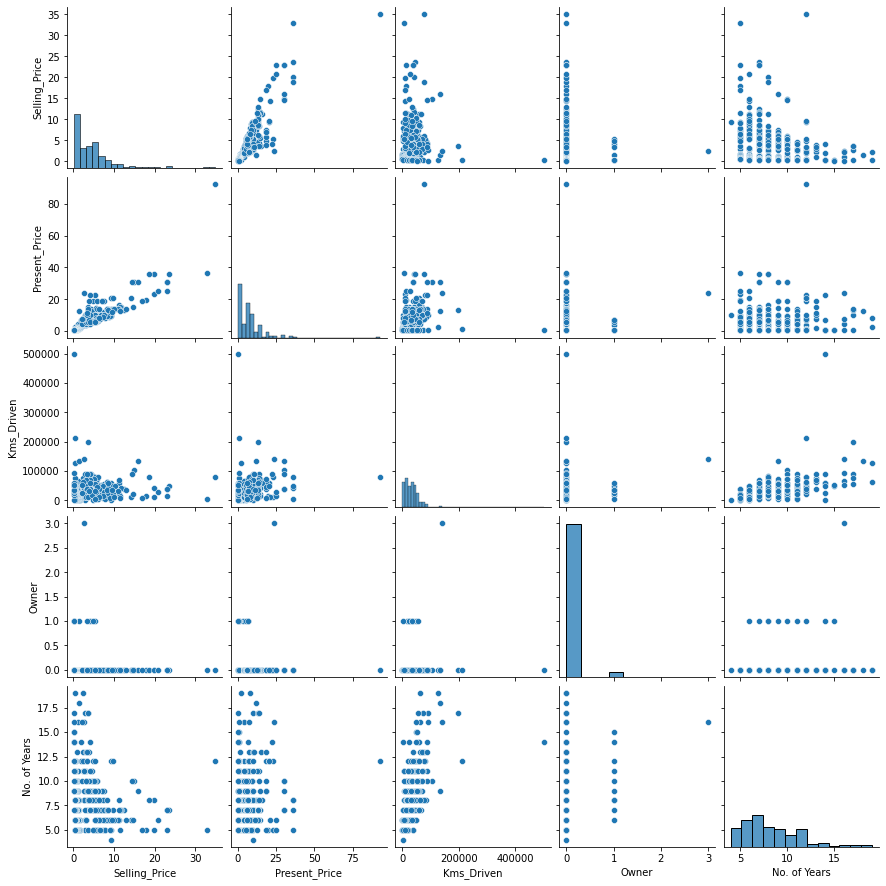

In [130]:
sns.pairplot(df)

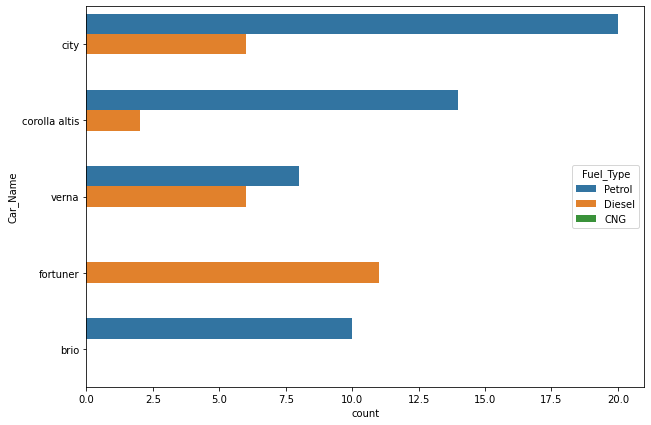

In [131]:
### Top 5 Model using Fuel_Type

plt.figure (figsize=(10,7)) 
sns.countplot(y='Car_Name', hue='Fuel_Type', data=df, order=df['Car_Name'].value_counts().iloc[:5].index)

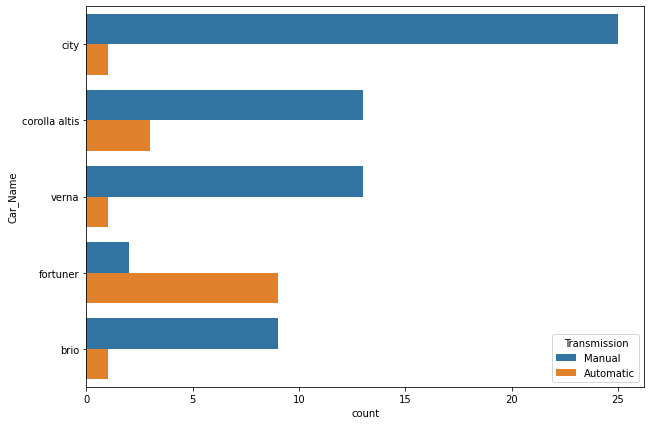

In [132]:
### Top 5 Model using Transmission

plt.figure (figsize=(10,7))
sns.countplot(y='Car_Name', hue='Transmission', data=df, order=df['Car_Name'].value_counts().iloc[:5].index)

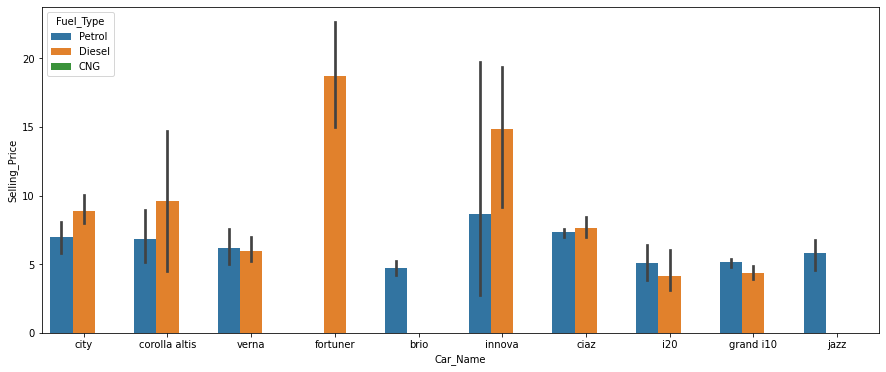

In [133]:
###LEt's see Top 10 car model's selling price using Fuel_type
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(y='Selling_Price', x='Car_Name', data=df, hue='Fuel_Type', order=df['Car_Name'].value_counts().iloc[:10].index)

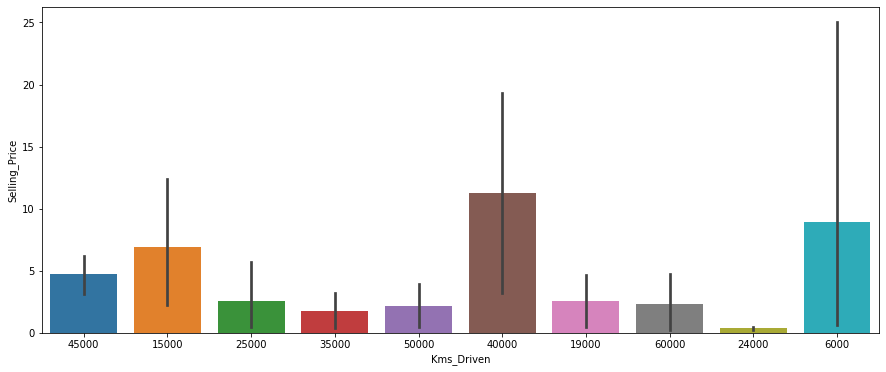

In [134]:
### Let's see whether Kms_Driven affects selling Price
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(y='Selling_Price', x='Kms_Driven', data=df, order=df['Kms_Driven'].sort_values(ascending=True).value_counts().iloc[:10].index )

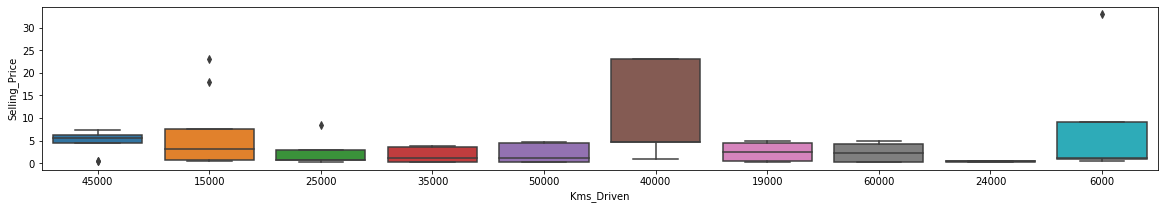

In [135]:
###Box plot to find outliers

fig, ax = plt.subplots(figsize=(20,3))
ax = sns.boxplot(x="Kms_Driven", y="Selling_Price", data=df, order=df['Kms_Driven'].sort_values(ascending=True).value_counts().iloc[:10].index)

In [136]:
print(df.corr())

               Selling_Price  Present_Price  Kms_Driven     Owner  No. of Years
Selling_Price       1.000000       0.878983    0.029187 -0.088344     -0.236141
Present_Price       0.878983       1.000000    0.203647  0.008057      0.047584
Kms_Driven          0.029187       0.203647    1.000000  0.089216      0.524342
Owner              -0.088344       0.008057    0.089216  1.000000      0.182104
No. of Years       -0.236141       0.047584    0.524342  0.182104      1.000000


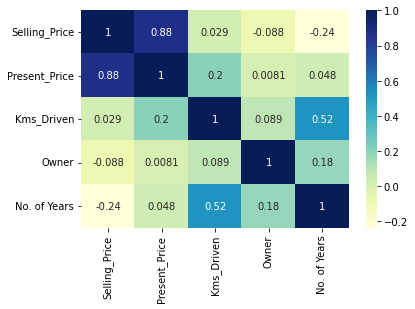

In [137]:
dataplot = sns.heatmap( df.corr(), cmap="YlGnBu", annot= True )
plt.show()

### Feature Engineering Part

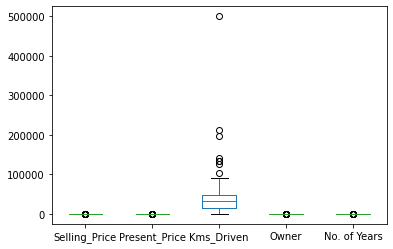

In [138]:
df.plot(kind='box')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


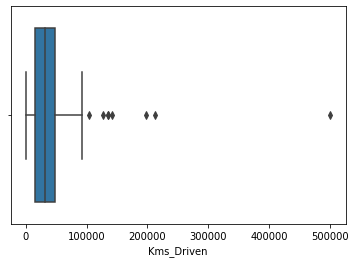

In [139]:
sns.boxplot(df['Kms_Driven'])

In [140]:
print(np.where(df['Kms_Driven']>400000))

(array([196]),)


In [141]:
from scipy import stats
z = np.abs(stats.zscore(df['Kms_Driven']))
print(z)

[2.56224461e-01 1.55910503e-01 7.73969009e-01 8.17758349e-01
 1.41743363e-01 8.98356493e-01 4.67546664e-01 9.06234809e-02
 4.29501455e-01 1.39605413e-01 8.96707953e-01 3.61977985e-01
 5.65325684e-01 2.81982896e-01 1.04269615e+00 1.55910503e-01
 1.21857851e-01 1.55910503e-01 3.72777615e-02 1.15778861e-01
 3.07741332e-01 8.89881968e-01 3.36219549e-01 2.14639735e-01
 5.13411825e-01 4.36533508e-01 4.68566390e-01 5.34415562e-01
 1.95630010e-01 2.07427373e-01 3.73285938e-01 4.44404977e-01
 5.28767618e-02 2.07427373e-01 2.07427373e-01 3.36168033e-01
 3.04459399e-01 2.31961906e+00 6.92082944e-01 6.45320772e-01
 3.20002347e-01 2.51371264e-01 5.42287031e-01 2.27518953e-01
 3.36219549e-01 5.65325684e-01 7.10541130e-01 7.22596078e-01
 2.85331493e-01 1.35989134e-03 1.74538627e+00 7.86351971e-02
 5.65325684e-01 2.52568654e+00 1.36655696e+00 8.51388254e-01
 9.23902015e-02 3.36219549e-01 6.53696029e-02 1.04393632e-01
 7.86609555e-02 9.37811570e-02 1.05745574e+00 2.58944244e-01
 7.97151601e-01 2.074273

In [142]:
Threshold = 3
z1=np.where(z>3)
z2=np.array(z1)
print(z2)
z3 = z2.flatten()
print(z3)

[[ 84 179 196]]
[ 84 179 196]


In [143]:
print('Old Shape:', df.shape)

Old Shape: (301, 9)


In [144]:
df.drop(z3, inplace=True, axis=0)
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No. of Years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [145]:
print('New Shape:',df.shape)

New Shape: (298, 9)


### Feature Selection

In [146]:
df.drop(['Car_Name'], inplace=True, axis=1)


In [147]:
df.head(10)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No. of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
5,9.25,9.83,2071,Diesel,Dealer,Manual,0,4
6,6.75,8.12,18796,Petrol,Dealer,Manual,0,7
7,6.50,8.61,33429,Diesel,Dealer,Manual,0,7
8,8.75,8.89,20273,Diesel,Dealer,Manual,0,6
9,7.45,8.92,42367,Diesel,Dealer,Manual,0,7


In [148]:
df = pd.get_dummies(df, drop_first=True)
df

,Selling_Price,Present_Price,Kms_Driven,Owner,No. of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,1,0,0,1
297,4.00,5.90,60000,0,7,0,1,0,1
298,3.35,11.00,87934,0,13,0,1,0,1
299,11.50,12.50,9000,0,5,1,0,0,1


In [149]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [150]:
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import xgboost as xgb

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [152]:
print(X_train.shape)
print(X_test.shape)

(238, 8)
(60, 8)


In [166]:
def final_predictions(model, name):
    new_model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("============= %s and Shuffle Split =============" %name)
    print("Accuracy: %f" %(r2_score(y_test, y_pred)))
    print("MSE: %f" %(mean_squared_error(y_test, y_pred)))
    print("MAE: %f" %(mean_absolute_error(y_test, y_pred)))
    
    new_model = model.fit(X, y)
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    cvs = cross_val_score(model, X, y, cv=cv)
    print('Shuffle and cross validate: %s \nAverage: %.2f' %(cvs, cvs.mean()))

In [167]:
### Linear Regression
lr_model = LinearRegression()
final_predictions(lr_model, 'Linear Regression')

============= Linear Regression and Shuffle Split =============
Accuracy: 0.880145
MSE: 4.601267
MAE: 1.221099
Shuffle and cross validate: [0.87023649 0.84521491 0.84587052 0.88933067 0.89211685] 
Average: 0.87


In [168]:
dt_model = DecisionTreeRegressor(random_state=0)
final_predictions(dt_model, 'Decision Tree Regressor')

============= Decision Tree Regressor and Shuffle Split =============
Accuracy: 0.928993
MSE: 2.725978
MAE: 0.833167
Shuffle and cross validate: [0.9376827  0.91074574 0.90171122 0.94251023 0.96505657] 
Average: 0.93


In [169]:
rf_model = RandomForestRegressor(random_state=0)
final_predictions(rf_model, 'Random Forest Regressor')

============= Random Forest Regressor and Shuffle Split =============
Accuracy: 0.923269
MSE: 2.945743
MAE: 0.759578
Shuffle and cross validate: [0.92617933 0.91831821 0.91724233 0.96070956 0.95153947] 
Average: 0.93


In [170]:
###Hyperparameter tuning (Random Search)

from itertools import product
import random

#params
booster = 'gbtree'
silent = 0

eta = [0.01,0.1,0.2,0.3]  #learning rate in gbm
min_child_weight = [1,2,0.5]  #minimum sum of weights of all observations required in a child
max_depth = [3,6,8]  #maximum depth of the tree
gamma = [0,1]  #a split will occur only when reduction in loss function > gamma 
subsample = [0.5,0.7,1] #fraction of rows to be sampled to make a decision tree
colsample_bytree = [0.5,0.7,1] #fraction of columns to be sampled to make a decision tree
# lambda_ = [0.4,0.8,1] #L2 regularization weights
alpha = [0,1]  #L1 reg weights



params =  [eta,min_child_weight,max_depth,gamma,subsample,colsample_bytree,alpha]
parameters = list(product(*params))
parameters = random.sample(parameters,100)
len(parameters)


min_rmse = float('inf')
best_params = parameters[0]
for p in parameters:
    eta = p[0]
    min_child_weight = p[1]
    max_depth = p[2]
    gamma = p[3]
    subsample = p[4]
    colsample_bytree = p[5]
    alpha = p[6]

    print('Random Search On Hyperparamters Xgboost')
    print(f"Fitting params -> eta: {eta}, min_child_weight: {min_child_weight} ,\
    max_depth:{max_depth}, gamma: {gamma}, subsample : {subsample},\
    col_sample_bytree: {colsample_bytree:},alpha: {alpha}")
    
    model = xgb.XGBRegressor(random_state=42,booster = 'gbtree',verbosity=0,eta=eta,
                             min_child_weight=min_child_weight,max_depth=max_depth,gamma=gamma,
                             subsample=subsample,colsample_bytree=colsample_bytree,alpha=alpha)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    y_pred_rmse = mean_squared_error(y_test,y_pred,squared=False)
    
    
    print(f'Train rmse: {y_pred_rmse}')
    
    
    if y_pred_rmse < min_rmse:
        min_rmse = y_pred_rmse
        best_params = p
        
    print('--'*50)
    

    
print(f'Found following best parameters: eta: {best_params[0]},\
min_child_weight: {best_params[1]} , max_depth:{best_params[2]}, gamma: {best_params[3]}, subsample : {best_params[4]}, \
col_sample_bytree: {best_params[5]},alpha: {best_params[6]} with validation loss {min_rmse}')

Random Search On Hyperparamters Xgboost
Fitting params -> eta: 0.1, min_child_weight: 1 ,    max_depth:8, gamma: 0, subsample : 0.5,    col_sample_bytree: 0.5,alpha: 1
Train rmse: 2.066982271474193
----------------------------------------------------------------------------------------------------
Random Search On Hyperparamters Xgboost
Fitting params -> eta: 0.01, min_child_weight: 0.5 ,    max_depth:3, gamma: 1, subsample : 1,    col_sample_bytree: 0.5,alpha: 0
Train rmse: 1.963222311583197
----------------------------------------------------------------------------------------------------
Random Search On Hyperparamters Xgboost
Fitting params -> eta: 0.2, min_child_weight: 2 ,    max_depth:8, gamma: 0, subsample : 1,    col_sample_bytree: 0.5,alpha: 1
Train rmse: 1.867202416995112
----------------------------------------------------------------------------------------------------
Random Search On Hyperparamters Xgboost
Fitting params -> eta: 0.01, min_child_weight: 1 ,    max_depth:

In [171]:
###Best Params taken from Hyperparameter Tuning.

eta = best_params[0] 
min_child_weight= best_params[1] 
max_depth=best_params[2]
gamma= best_params[3]
subsample = best_params[4]
colsample_bytree= best_params[5]
alpha= best_params[6] 

xgb_model = xgb.XGBRegressor(random_state=42,booster = 'gbtree',verbosity=0,eta=eta,min_child_weight=min_child_weight,
                         max_depth=max_depth,gamma=gamma,subsample=subsample,colsample_bytree=colsample_bytree,alpha=alpha)

final_predictions(xgb_model, 'XGB Regressor')


============= XGB Regressor and Shuffle Split =============
Accuracy: 0.961282
MSE: 1.486401
MAE: 0.651419
Shuffle and cross validate: [0.95068832 0.93541794 0.92522112 0.96351336 0.92488374] 
Average: 0.94
